Functions and Modules
=====

Some of the code contained within this notebook is from Ch. 2 of *Data Science from Scratch* by J. Grus.



A **function** is an operation for taking zero or more inputs and producing an output.


In [8]:
def double(x):
    """ doubles the argument provided """
    return 2 * x

print double(2)
print double(2.2)
print double("BOO")

def halve(x):
    """ halves the argument provided """
    return x / 2

print halve(2)
print halve(2.2)
#print halve("BOOBOO")

4
4.4
BOOBOO
1
1.1


In Python, functions are so called 'first-class' members.  They can be assigned to a variable and passed to functions.

Simple functions can be defined on one line or in-line with lambdas.

In [9]:
Twice_x = double
Four_x = lambda x: 2 * Twice_x(x)

print Twice_x(2)
print Four_x(2)

4
8


A function can have a variable numbers of arguments.  Default parameters are also allowed. 

In [10]:
def print_me(message = "Hello, brave world!"):
    print message
    
def print_all(*args, **kwargs):
    
    key_values = [key + '-' + value for key, value in kwargs.items()]
    all_args = list(args)
    all_args.extend(key_values)
    
    print all_args
    
print_me()
print_me("Boo")
print_all(1, 2, 3, message='boo', other_message='foo')
    

Hello, brave world!
Boo
[1, 2, 3, 'message-boo', 'other_message-foo']


Recursive functions are fun.

In [11]:
def X_toThe(X, N):
    if N == 0:
        return 1
    else:
        return X * X_toThe(X, N - 1)

    
Two_toTheN = lambda N: X_toThe(2, N) 
    
print X_toThe(2, 3)
print Two_toTheN(3)

        

8
8


**Modules** are collections of functions that can be brought in.  These are often created by third parties.  We will use a number of these. 

We have already seen `matplotlib` and `Counter`.  

In [12]:
# An entire module can be brought in with import. 
import matplotlib.pyplot

# or with an alias ...
import matplotlib.pyplot as plt

import collections

print collections.Counter([1,1,1,2,2])


Counter({1: 3, 2: 2})


In [13]:
# or only a few methods, bringing them into the default namespace
from collections import Counter

print Counter([1,1,1,2,2])

Counter({1: 3, 2: 2})


In [14]:
# ???
from __future__ import division

print 3 / 2

1.5


(83000, 88000, 48000, 76000, 69000, 76000, 60000, 83000, 48000, 63000) (8.7, 8.1, 0.7, 6, 6.5, 7.5, 2.5, 10, 1.9, 4.2)
defaultdict(<type 'list'>, {'8+': [83000, 88000, 83000], '3-5': [63000], '5-8': [76000, 69000, 76000], '0-3': [48000, 60000, 48000]})
<dictionary-itemiterator object at 0x7efcf720e310>
{'8+': 84666.66666666667, '3-5': 63000.0, '5-8': 73666.66666666667, '0-3': 52000.0}


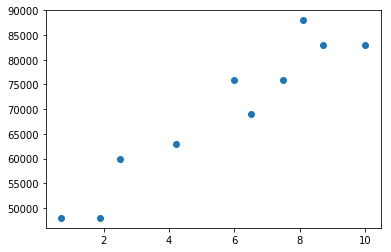

In [18]:
# Example:
# Look at some data on company employees as it relates to their time at the company.  
# Create a scatter plot of salaries and tenure with salary as the dependent variable.  
# Also, calculate and display the mean salary for 4 ranges of tenure 
#    (i.e, [0-3), [3-5), [5-8) and more than 8 years).  

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

# Create parallel arrays of salaries and tenures
salaries, tenures = zip(*salaries_and_tenures)

print salaries, tenures
plt.scatter(tenures, salaries)

from collections import defaultdict

salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    if tenure < 3:
        salary_by_tenure["0-3"].append(salary)
    elif tenure < 5:
        salary_by_tenure["3-5"].append(salary)
    elif tenure < 8:
        salary_by_tenure["5-8"].append(salary)
    else:
        salary_by_tenure["8+"].append(salary)
        
print salary_by_tenure

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure.iteritems()
}

print average_salary_by_bucket

In [3]:
# Example:
# Create a function to calculate the floor of log_2

# print floorLog2(9)

from __future__ import division

def floorLog2(n):
    if n <= 1:
        return 0
    
    result = 1
    while n > 2:
        n /= 2
        result += 1

    return result - 1

print floorLog2(9)
print floorLog2(17)

3
4


In [14]:
# Example:
# Find the minimum, maximum and range of a list

def maximum(A):
    currMax = A[0]
    for x in A:
        if x > currMax:
            currMax = x
    
    return currMax

def minimum(A):
    currMax = A[0]
    for x in A:
        if x < currMax:
            currMax = x
    
    return currMax

def listRange(A):
    return maximum(A) - minimum(A)

exam_scores = [36, 84, 53]
print maximum(exam_scores), minimum(exam_scores), listRange(exam_scores)

84 36 48


In [6]:
# Example:
# Create a hangman game make using of methods and random guesses ...

from IPython.display import clear_output

def updateUnknownPositions(secretWord, unknownPosition, toUncover):
    i = 0
    while(i < len(secretWord)):
        if secretWord[i] == toUncover:
            unknownPosition[i] = " "
        
        i += 1

def printWord(secretWord, unknownPositions): 
    
    for c, u in zip(secretWord, unknownPositions):
        if u == '*':
            print '-',
        else:
            print c,
    
#     i = 0
#     while(i < len(secretWord)):
#         if unknownPositions[i] == '*':
#             print "_",
#         else:
#             print secretWord[i],
#         i += 1
        
    print ""
    
def hasUnknownLetters(unknownPositions):
    return unknownPositions.count('*') > 0

def isUnknownLetter(secretWord, unknownPositions, letter):
    
    rValue = False
    
    for c, u in zip(secretWord, unknownPositions):
        if u == "*" and c == letter:
            rValue = True
    
#     i = 0
#     while(i < len(unknownPositions)):
#         if unknownPositions[i] == '*' and secretWord[i] == letter:
#             rValue = True
#         i += 1
        
    return rValue
    

def printHangman(missCount):
    status = ""
    
    status += "   ===========\n";
    status += "   ||/      |\n";
    status += "   ||       |\n";
    status += "   ||       "; 
    status += "0\n" if (missCount >= 1) else "\n"
    status += "   ||      ";
    status += "\\|" if (missCount >= 2) else " "
    status += "/ \n" if (missCount >= 3) else "\n"
    status += "   ||       ";
    status += "|\n" if (missCount >= 4) else "\n"
    status += "   ||     ";
    status += ",/ " if (missCount >= 4) else ""
    status += "\\,\n" if (missCount >= 5) else  "\n"
    status += "   ||\n";
    status += ",,,||,,,,,,,,,,,,,,\n";
    
    print status


missCount = 0
secredWord = list("FIREUPCHIPS")
unknownPositions = ['*' for _ in secredWord]
guess = ' '

while missCount < 5 and hasUnknownLetters(unknownPositions):
    
    printHangman(missCount)
    printWord(secredWord, unknownPositions)
    
    print "# of misses: {}".format(missCount)
    print "Guess a letter: ",
    guess = str(raw_input()).upper()
    
    if isUnknownLetter(secredWord, unknownPositions, guess):
        updateUnknownPositions(secredWord, unknownPositions, guess)
    else:
        missCount += 1
    
    clear_output()
    
printHangman(missCount)
print "You win!" if missCount < 5 else "You lose!"






   ||/      |
   ||       |
   ||       0
   ||      \|/ 
   ||       |
   ||     ,/ \,
   ||
,,,||,,,,,,,,,,,,,,

You lose!
